# Groupby and apply
Powerful data query mechanisms
see '3.13 Grouping Rows by Values' in Albon

## Load a dataset

In [75]:
import pandas as pd
import seaborn as sns
url="https://raw.githubusercontent.com/chrisalbon/simulated_datasets/master/titanic.csv"
df = pd.read_csv(url)

In [9]:
#how many rows in DataFrame
print(len(df))

#look at first few
df.head()

1313


,Name,PClass,Age,Sex,Survived,SexCode
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
1,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
4,"Allison, Master Hudson Trevor",1st,0.92,male,1,0


In [67]:
#lets see what type of data is in each column
df.dtypes

#This DataFrame has 3 numerical types(Age, Survived, and Sexcode) 
# and three object types (Name, PClass and Sex).
# The object type in this case is a string

Name         object
PClass       object
Age         float64
Sex          object
Survived      int64
SexCode       int64
dtype: object

## 'Groupby' allows you to separate your data by some selector or combination of selectors and then apply a function over each of these groups to calculate a statistic.

The function will only apply to the fields where it makes sense (which means numerical data.)


## Lets see who survived based on Sex.  
I'm grouping all the rows by sex, and then adding up all the values in numerical fields

In [34]:
#this is a groupby object, you can't do anything with it until you apply a function to it
gb = df.groupby('Sex')
print(type(gb))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [ ]:
#after applying a function to the groupby object you get a dataframe
df1=df.groupby('Sex').sum()
print(type(df1))
dgb

<class 'pandas.core.frame.DataFrame'>


,Age,Survived,SexCode
Sex,,,
female,8466.17,308,462
male,14514.71,142,0


In [38]:
# adding up Ages is not helpful, neither is SexCode, lets just see who survived
df1.iloc[:,1]

Sex
female    308
male      142
Name: Survived, dtype: int64

In [40]:
# Note that this DataFrame has summary stats only, it's not hiding any of the other data
df1.shape

(2, 3)

## Lets see who survived based on Sex and PClass.  

In [43]:
#Note that the grouping has changed
df2=df.groupby(['Sex','PClass']).sum()
df2
# df2.iloc[:,1]

Age  Survived  SexCode
Sex    PClass                            
female 1st     3815.00       134      143
       2nd     2328.00        94      107
       3rd     2323.17        80      212
male   *          0.00         0        0
       1st     5149.92        59        0
       2nd     3671.63        25        0
       3rd     5693.16        58        0

In [45]:
#what is that *?  Apparently it's a mistyped passenger class
#short any other info (were there other Jacobsons onboard?) it's hard to tell what his PClass is
df[df.PClass=='*'].sum()

Name        Jacobsohn Mr Samuel
PClass                        *
Age                         0.0
Sex                        male
Survived                      0
SexCode                       0
dtype: object

## You do not have to use the built in faunctions for groupby.  You can make your own.
Use groupby's apply() method, <mark>It takes a DataFrame and returns a DataFrame, or a Series or scaler

In [64]:
#lets find the oldest male and female
def fun1(df):
    #this function finds the oldest male and female passenger
    #sort by age, this returns a series with just age
    # return (df.Age.sort_values(ascending=False).iloc[0])

    #sort by age, return the name and age column
    return (df.sort_values('Age',ascending=False).iloc[0,[0,2]])


df.groupby('Sex').apply(fun1)

,Name,Age
Sex,,
female,"Crosby, Mrs Edward Gifford (Catherine Elizabet...",69.0
male,"Goldschmidt, Mr George B",71.0


In [65]:
#oldest male and female who died/survived
df.groupby(['Sex','Survived']).apply(fun1)

Name   Age
Sex    Survived                                                         
female 0                             Straus, Mrs Isidor (Ida Blun)  63.0
       1         Crosby, Mrs Edward Gifford (Catherine Elizabet...  69.0
male   0                                    Artagaveytia, Mr Ramon  71.0
       1                           Frolicher-Stehli, Mr Maxmillian  60.0

## Does gender or passenger class affect your chances?

In [74]:
#survival based on class
def fun3(df):
    #each dataframe passed to this function will contain 
    #all rows of 1 gender (M,F) in one of the PClasses (1st, 2nd, 3rd) 
    #just divide the len of the dataframe by the number who survived to see
    #survival rate
    return df.Survived.sum()/len(df)


res=df.groupby(['Sex','PClass']).apply(fun3)
res

Sex     PClass
female  1st       0.937063
        2nd       0.878505
        3rd       0.377358
male    *         0.000000
        1st       0.329609
        2nd       0.145349
        3rd       0.116232
dtype: float64

## I would like to graph this but my indexes are a pain, reset_index to the rescue!
It will create a dataframe from this Series and save the multiindex as columns

In [86]:
res1=res.reset_index()
res1

,Sex,PClass,0
0,female,1st,0.937063
1,female,2nd,0.878505
2,female,3rd,0.377358
3,male,*,0.000000
4,male,1st,0.329609
5,male,2nd,0.145349
6,male,3rd,0.116232


In [87]:
#get rid of that *
res1.drop([3],inplace=True)
res1

,Sex,PClass,0
0,female,1st,0.937063
1,female,2nd,0.878505
2,female,3rd,0.377358
4,male,1st,0.329609
5,male,2nd,0.145349
6,male,3rd,0.116232


In [88]:
res1 = res1.rename(columns = {0 : 'Survival rate %'})
res1['Survival rate %'] = res1['Survival rate %']*100

Index(['Sex', 'PClass', 0], dtype='object')


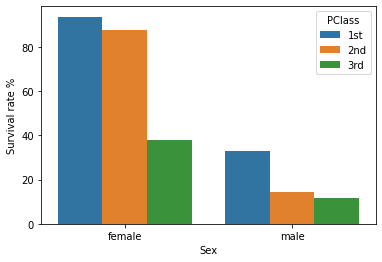

In [90]:
#lets graph this, oh no? what to do with the index?  And what I have is a series
sns.barplot(data=res1,x="Sex",y='Survival rate %',  hue="PClass" );